<a href="https://colab.research.google.com/github/Jordy-Rodrigues/PyCaret/blob/main/Projeto_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRIMEIRO PROJETO USANDO PyCaret

SITE: https://pycaret.org/

In [ ]:
# IMPORTAR O PANDAS 
import pandas as pd

In [ ]:
# ABRIR O DATASET
DADOS = pd.read_csv('/content/drive/MyDrive/data_classification.csv')
# MOSTRAR O CABEÇALHO E AS 5 PRIMEIRAS LINHAS
DADOS.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [ ]:
# INSTALAR O PyCaret
!pip install pycaret

In [ ]:
# VER A VERSÃO INSTALADA 
from pycaret.utils import version
version()

'2.3.9'

In [ ]:
from pycaret import classification
# MOSTRAR DETALHES DO DATASET
classificador = classification.setup(data= DADOS, target='Personal Loan')

,Description,Value
0,session_id,5320
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


PROCESSO DE TREINAMENTO 

In [ ]:
# CRIAR O MODELO
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.9364,0.8846,0.8846,0.8846,0.8728,0.8728
1,0.9750,0.8999,0.8077,0.9130,0.8571,0.8435,0.8454
2,0.9750,0.9344,0.8846,0.8519,0.8679,0.8541,0.8543
3,0.9857,0.9576,0.9231,0.9231,0.9231,0.9152,0.9152
4,0.9821,0.9384,0.8846,0.9200,0.9020,0.8921,0.8923
5,0.9786,0.9716,0.9630,0.8387,0.8966,0.8847,0.8873
6,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810,0.8817
7,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770,0.8770
8,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633,0.8648


In [ ]:
# CRIAR AGRUPAMENTO COM Boosting
Boosting = classification.ensemble_model(classification_dt, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9786,0.9364,0.8846,0.8846,0.8846,0.8728,0.8728
1,0.9714,0.8979,0.8077,0.8750,0.8400,0.8243,0.8251
2,0.9750,0.9344,0.8846,0.8519,0.8679,0.8541,0.8543
3,0.9893,0.9768,0.9615,0.9259,0.9434,0.9375,0.9377
4,0.9821,0.9384,0.8846,0.9200,0.9020,0.8921,0.8923
5,0.9857,0.9921,1.0000,0.8710,0.9310,0.9231,0.9258
6,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810,0.8817
7,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633,0.8648
8,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633,0.8648


In [ ]:
# COMPARAR COM OUTRAS MÁQUINAS PREDITIVAS
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9861,0.9955,0.8974,0.9556,0.9243,0.9166,0.9180,0.377
rf,Random Forest Classifier,0.9846,0.9952,0.8481,0.9878,0.9111,0.9028,0.9068,0.754
lightgbm,Light Gradient Boosting Machine,0.9843,0.9955,0.8707,0.9593,0.9118,0.9032,0.9051,0.130
et,Extra Trees Classifier,0.9803,0.9876,0.7991,0.9915,0.8836,0.8730,0.8799,0.510
dt,Decision Tree Classifier,0.9786,0.9404,0.8934,0.8832,0.8870,0.8752,0.8760,0.030
ada,Ada Boost Classifier,0.9639,0.9751,0.7345,0.8643,0.7911,0.7716,0.7763,0.218
lda,Linear Discriminant Analysis,0.9464,0.9620,0.6179,0.7711,0.6824,0.6538,0.6605,0.022
ridge,Ridge Classifier,0.9403,0.0000,0.3979,0.9366,0.5548,0.5287,0.5863,0.025
lr,Logistic Regression,0.9157,0.9310,0.3597,0.5842,0.4409,0.3987,0.4143,0.084
knn,K Neighbors Classifier,0.9064,0.5607,0.0340,0.5000,0.0631,0.0532,0.1106,0.155


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3173, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

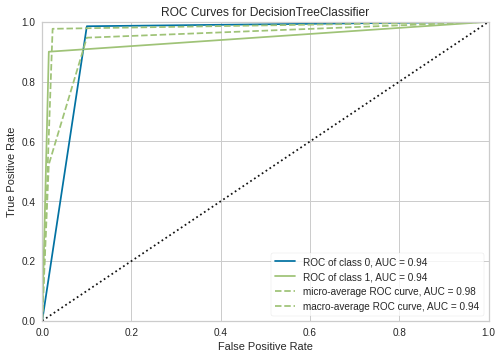

In [ ]:
# VISUALIZAR OS DADOS EM GRÁFICO UTILIZANDO AUC-ROC 'auc'
classification.plot_model(classification_dt, plot='auc')

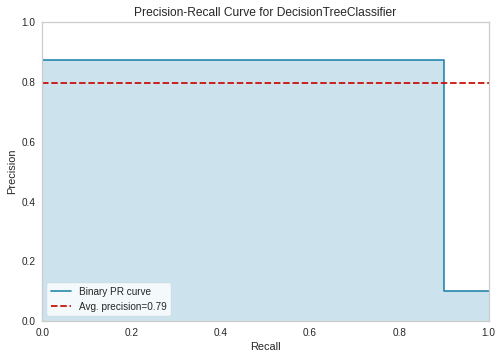

In [ ]:
 # VISUALIZAR OS DADOS EM GRÁFICO UTILIZANDO PRECISION RECALL 'pr'
classification.plot_model(classification_dt, plot='pr')

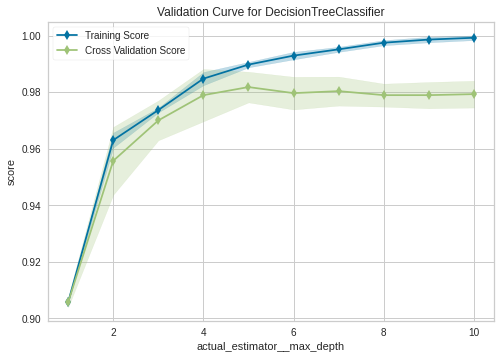

In [ ]:
 # VISUALIZAR OS DADOS EM GRÁFICO UTILIZANDO VALIDATION CURVE 'vc'
classification.plot_model(classification_dt, plot='vc')

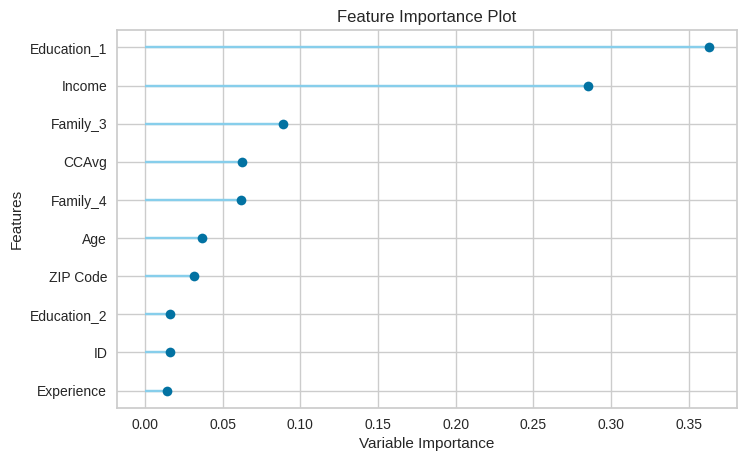

In [ ]:
 # VISUALIZAR OS DADOS EM GRÁFICO UTILIZANDO A IMPORTÂNCIA DAS VARIÁVEIS 
classification.plot_model(classification_dt, plot='feature')

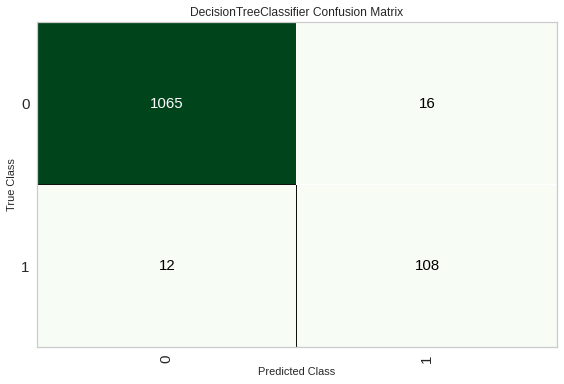

In [ ]:
# VISUALIZAR OS DADOS EM GRÁFICO UTILIZANDO A MATRIZ DE CONFUSÃO 
classification.plot_model(classification_dt, plot='confusion_matrix')

In [ ]:
# AVALIAÇÃO DAS MÁQUINAS PREDITIVAS
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INTERPRETABILIDADE DOS MODELOS

In [ ]:
# INSTALAR A BIBLIOTECA SHAP
!pip install shap

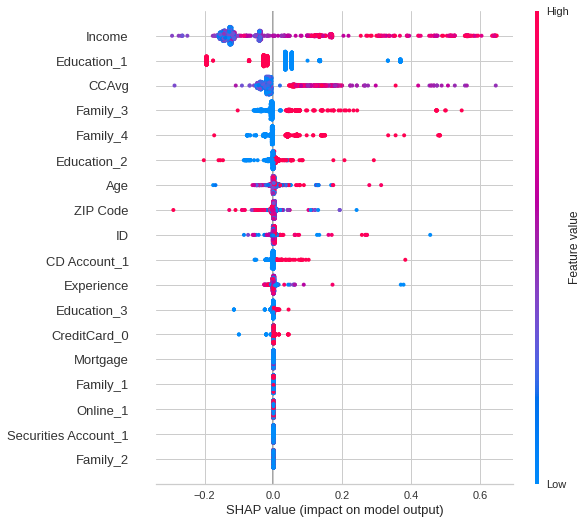

In [ ]:
# CRIAR O MODELO
classification.interpret_model(classification_dt)

In [ ]:
# DADOS PARA TESTE
teste_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv')

In [ ]:
# FAZENDO NOVAS PREVISÕES
predição = classification.predict_model(classification_dt, data= teste_classification)

predição

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.98,0.947,0.9062,0.8878,0.8969,0.8858,0.8859


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,1.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,1.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,1.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,1.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,1.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,1.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,1.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,1.0


In [ ]:
# SALVAR O MODELO
classification.save_model(classification_dt, 'Modelo_Decision_tree')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personal Loan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', 

In [ ]:
# CARREGAR OS DADOS 
abrir = classification.load_model(model_name='Modelo_Decision_tree')

Transformation Pipeline and Model Successfully Loaded
